In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:

archivo=pd.read_json("globos_de_oro.zip")
df=pd.DataFrame(archivo)
df=df[["anho","categoria","nominacion","titulo","subtitulo"]]


In [3]:
categorias_pelicula = [
    'Best Motion Picture - Drama',
    'Best Motion Picture - Musical or Comedy',
    'Best Motion Picture - Animated',
    'Best Motion Picture - Foreign Language',
]
categorias_persona = [
    'Best Performance by an Actress in a Motion Picture - Drama',
    'Best Performance by an Actor in a Motion Picture - Drama',
    'Best Performance by an Actress in a Motion Picture - Musical or Comedy',
    'Best Performance by an Actor in a Motion Picture - Musical or Comedy',
    'Best Performance by an Actress in a Supporting Role in any Motion Picture',
    'Best Performance by an Actor in a Supporting Role in any Motion Picture',
    'Best Director - Motion Picture',
    'Best Screenplay - Motion Picture',
    'Best Original Score - Motion Picture',
    'Best Original Song - Motion Picture',
    'Best Performance by an Actress in a Limited Series or a Motion Picture Made for Television',
    'Best Performance by an Actor in a Limited Series or a Motion Picture Made for Television',
]

In [76]:
def total_nominaciones(lista_nombres):
    dict={}
    for nombre in lista_nombres:
        win_count=0
        loss_count=0
        df_aux=df.loc[(df.titulo == nombre)]
        df_sub=df_aux.loc[(df_aux.categoria.isin(categorias_persona)) | (df_aux.categoria.isin(categorias_pelicula))]
        for Winner in range (df_aux[df.nominacion == "Winner"].shape[0]):
            win_count+=1
        for Nominee in range (df_aux[df.nominacion == "Nominee"].shape[0]):
            loss_count+=1
        dict[nombre]={
            "victorias": win_count,
            "derrotas": loss_count
            }
    return dict
nombres_a_buscar= ["Tom Hanks", "Meg Ryan", "Brad Pitt"]
dict = total_nominaciones(nombres_a_buscar)
dict

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:10: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  # Remove the CWD from sys.path while we load stuff.


{'Tom Hanks': {'victorias': 4, 'derrotas': 5},
 'Meg Ryan': {'victorias': 0, 'derrotas': 3},
 'Brad Pitt': {'victorias': 1, 'derrotas': 4}}

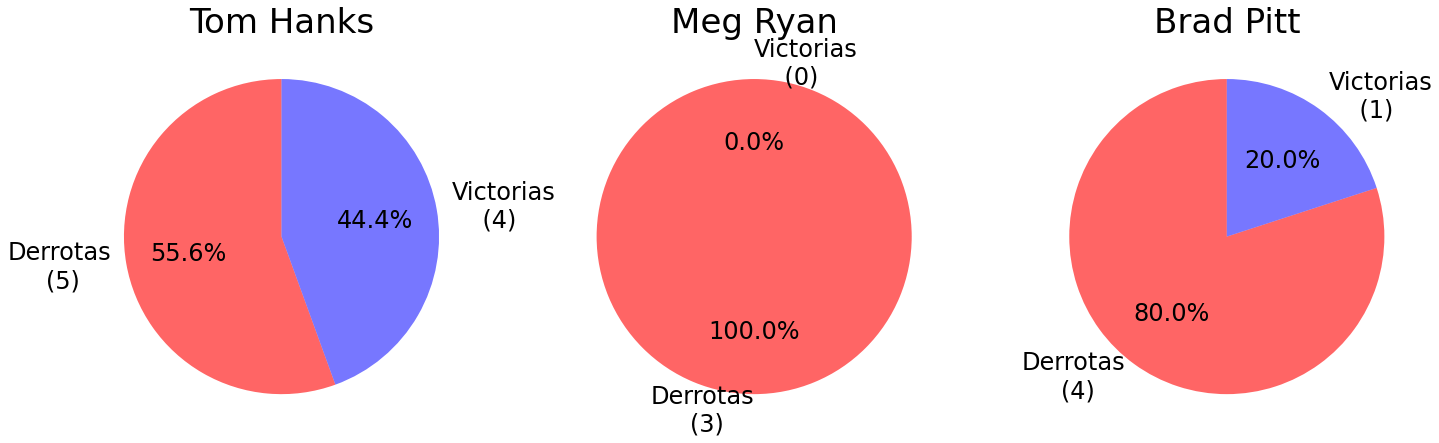

In [112]:
#graficos en barra y torta del ejercicio 1
alpha = 1.00
opciones = {
    'autopct': '%1.1f%%',
    'shadow': False, 
    'startangle': 90,
    'textprops': {'size': 24},
    'colors': ['#FF000099', '#0000FF88'], 
}
cantidad_nombres=len(dict)

plt.figure(figsize=(cantidad_nombres*8, 8))
for contador, nombre in enumerate(dict, start=1):
    
    victorias= dict[nombre]["victorias"]
    derrotas= dict[nombre]["derrotas"]
    x_labels = [
    'Derrotas\n({})    '.format(derrotas),
    'Victorias\n    ({})'.format(victorias),
    ]
    y = [
        derrotas,
        victorias,
        ]
    plt.subplot(1, cantidad_nombres, contador)
    plt.pie(y, labels=x_labels, **opciones)
    plt.title(nombre, fontsize= 34)

''

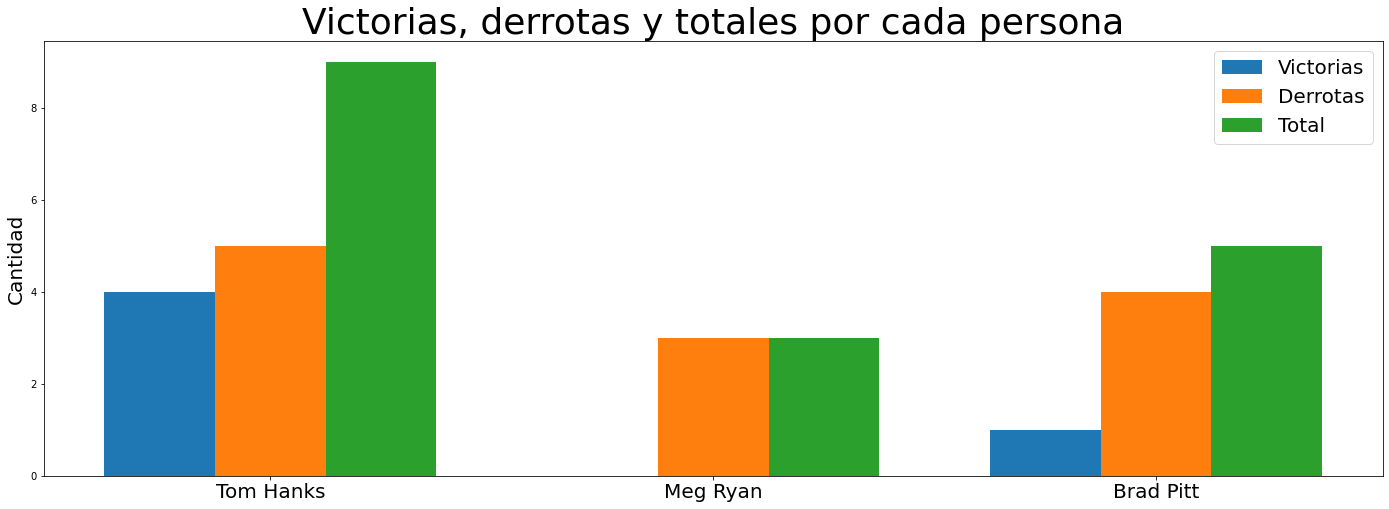

In [114]:

victorias = [dict[nombre]['victorias'] for nombre in nombres_a_buscar]
derrotas = [dict[nombre]['derrotas'] for nombre in nombres_a_buscar]
totales = [dict[nombre]['victorias']+dict[nombre]['derrotas'] for nombre in nombres_a_buscar]
N = len(nombres_a_buscar)
x = np.arange(N)
x_labels = nombres_a_buscar
width = 0.25

plt.figure(figsize=(cantidad_nombres*8, 8))
plt.bar(x - 0.25, victorias, width, label='Victorias')
plt.bar(x       , derrotas, width, label='Derrotas')
plt.bar(x + 0.25, totales, width, label='Total')
plt.ylabel('Cantidad', fontsize=20)
plt.title('Victorias, derrotas y totales por cada persona', fontsize=36)
plt.xticks(x, x_labels, fontsize=20)
plt.legend(fontsize=20)
;

In [195]:
def cantidades_nom():
    menor_año=df.anho.min()
    mayor_año=df.anho.max()
    Dict={}
    df_fix=df.loc[(df.categoria.isin(categorias_pelicula)) | (df.categoria.isin(categorias_persona))]
    for anho in range(menor_año, mayor_año+1):
        Dict[anho]=[]
        df_aux=df_fix.loc[(df.anho == anho)]
        nombres=[]
        for i in range(df_aux.shape[0]):
            peli=df_aux.subtitulo[df_aux.index[i]]
            
            if peli == "":
                peli= df_aux.titulo[df_aux.index[i]]
            
            if peli not in nombres:
                nombres.append(peli)
            
        for nombre in nombres:
            nominaciones=0
            df_nom=df_aux.loc[(df_aux.subtitulo == nombre) | (df_aux.titulo == nombre)]
            for j in range(df_nom.shape[0]):
                nominaciones+=1
                        
            if nominaciones > 1:
                Dict[anho].append({
                    "nombre":nombre,
                    "cantidad":nominaciones,
                    })
                    
    cantidades=[]
    nombres=[]
        
    for anho in sorted(Dict):
        for item in Dict[anho]:
            cantidades.append(item["cantidad"])
            nombres.append("{} | {}".format(anho, item["nombre"]))
                
        
    return {
        "cantidades":cantidades,
        "nombres":nombres,
    }

d=cantidades_nom()

In [193]:
d["nombres"][:10]

[2, 2, 2, 2, 2, 2, 3, 2, 2, 5, 5]

In [199]:
d["cantidades"][:10]

[2, 2, 2, 2, 2, 2, 3, 2, 2, 5]

In [ ]:
y = np.array(d['cantidades'])
y_labels = d['nombres']
x = np.arange(y.size)
height = y

plt.figure(figsize=(5, y.size//2.5))
plt.barh(x, y)
plt.xlim([0, y.max()+0.5])
plt.yticks(x, y_labels, fontsize=12)
for i in range(y.size): 
    plt.text(x = y[i]+0.25, y = i-0.2, s = y[i], fontsize=12)
plt.title('Películas que recibieron más de 1 nominación en un mismo año\n({} películas en total)'.format(y.size), fontsize=15)
;

In [7]:
#Graficos para el ejercicio 3

In [240]:
def racha():
    ganadores = []
    perdedores = []
    nombres = []
    df_aux=df.loc[(df.categoria.isin(categorias_persona))]
    
    df_nombres=df_aux.loc[df.subtitulo != ""]
    
    nombres=df_nombres.titulo.unique()
    
    print("Cantidad de personas:", nombres.size)
    for nombre in nombres:
        df_actor=df_nombres.loc[df_nombres.titulo == nombre]
        si = 0
        no = 0
        for nominacion in df_actor.nominacion:
            if nominacion == "Winner":
                si+=1
            elif nominacion == "Nominee":
                no+=1

        if (no == 0) and (si > 1):
                ganadores.append({
                    'nombre': nombre,
                    'cantidad': si,
                })
        else: 
            if (si == 0 and no > 1):
                perdedores.append({
                    'nombre': nombre,
                    'cantidad': no,
                })
    return {
        'ganadores': sorted(ganadores, reverse=False, key=lambda item: item['cantidad']),
        'perdedores': sorted(perdedores, reverse=False, key=lambda item: item['cantidad']),
    }


d = racha()
ganadores, perdedores = d['ganadores'], d['perdedores']
len(ganadores), len(perdedores)

Cantidad de personas: 1806


(18, 294)

In [225]:
print(len(ganadores))
ganadores

18


[{'nombre': 'Agnes Moorehead', 'cantidad': 2},
 {'nombre': 'Angela Lansbury', 'cantidad': 2},
 {'nombre': 'Edmund Gwenn', 'cantidad': 2},
 {'nombre': 'Grace Kelly', 'cantidad': 2},
 {'nombre': 'Omar Sharif', 'cantidad': 2},
 {'nombre': 'Ruth Gordon', 'cantidad': 2},
 {'nombre': 'William Friedkin', 'cantidad': 2},
 {'nombre': 'Paddy Chayefsky', 'cantidad': 2},
 {'nombre': 'William Peter Blatty', 'cantidad': 2},
 {'nombre': 'Bo Goldman', 'cantidad': 2},
 {'nombre': 'Martin Landau', 'cantidad': 2},
 {'nombre': 'Jim Broadbent', 'cantidad': 2},
 {'nombre': 'Alexander Payne, Jim Taylor', 'cantidad': 2},
 {'nombre': 'Patricia Arquette', 'cantidad': 2},
 {'nombre': 'Damien Chazelle', 'cantidad': 2},
 {'nombre': 'Justin Hurwitz', 'cantidad': 2},
 {'nombre': 'Robert Bolt', 'cantidad': 3},
 {'nombre': 'Elia Kazan', 'cantidad': 4}]

In [233]:
print(len(perdedores))
perdedores

294


[{'nombre': 'George Duning', 'cantidad': 2},
 {'nombre': 'Bette Davis', 'cantidad': 2},
 {'nombre': 'Judy Holliday', 'cantidad': 2},
 {'nombre': 'James Stewart', 'cantidad': 2},
 {'nombre': 'Bronislau Kaper', 'cantidad': 2},
 {'nombre': 'Gene Kelly', 'cantidad': 2},
 {'nombre': 'Gilbert Roland', 'cantidad': 2},
 {'nombre': 'Helen Hayes', 'cantidad': 2},
 {'nombre': 'Karl Malden', 'cantidad': 2},
 {'nombre': 'Eddie Albert', 'cantidad': 2},
 {'nombre': 'Deborah Kerr', 'cantidad': 2},
 {'nombre': 'Lee J. Cobb', 'cantidad': 2},
 {'nombre': 'Tony Curtis', 'cantidad': 2},
 {'nombre': 'Clark Gable', 'cantidad': 2},
 {'nombre': 'Wendy Hiller', 'cantidad': 2},
 {'nombre': 'Harry Guardino', 'cantidad': 2},
 {'nombre': 'Efrem Zimbalist Jr.', 'cantidad': 2},
 {'nombre': 'Richard Brooks', 'cantidad': 2},
 {'nombre': 'Simone Signoret', 'cantidad': 2},
 {'nombre': 'Otto Preminger', 'cantidad': 2},
 {'nombre': 'Trevor Howard', 'cantidad': 2},
 {'nombre': 'Dirk Bogarde', 'cantidad': 2},
 {'nombre': 'Bo

''

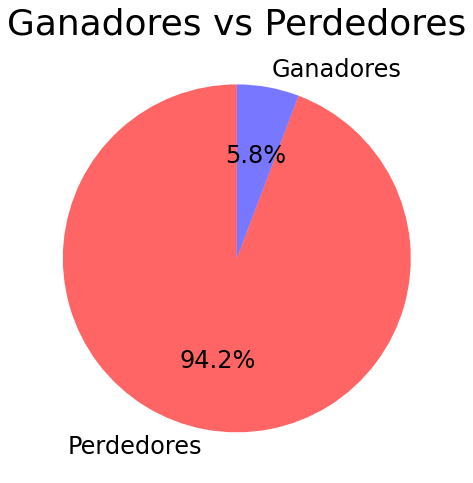

In [236]:
x_labels = ['Perdedores', 'Ganadores']
y = [len(perdedores), len(ganadores)]

alpha = 1.00
opciones = {
    'autopct': '%1.1f%%',
    'shadow': False, 
    'startangle': 90,
    'textprops': {'size': 24},
    'colors': ['#FF000099', '#0000FF88'], 
}

plt.figure(figsize=(16, 8))
plt.pie(y, labels=x_labels, **opciones)
plt.title('Ganadores vs Perdedores', fontsize=36)
;

In [230]:
y = np.array([item['cantidad'] for item in ganadores])
y_labels = [item['nombre'] for item in ganadores]
x = np.arange(y.size)
height = y

plt.figure(figsize=(5, y.size//2.5))
plt.barh(x, y)
plt.xlim([0, y.max()+0.5])
plt.yticks(x, y_labels, fontsize=12)
for i in range(y.size): 
    plt.text(x = y[i]+0.25, y = i-0.2, s = y[i], fontsize=12)
plt.title('Personas que siempre han ganado\n(cantidad de nominaciones > 1)', fontsize=15)
;

,anho,categoria,nominacion,titulo,subtitulo
5229,1999,Best Performance by an Actress in a Motion Pic...,Nominee,Cameron Diaz,There's Something About Mary
5368,2000,Best Performance by an Actress in a Supporting...,Nominee,Cameron Diaz,Being John Malkovich
5622,2002,Best Performance by an Actress in a Supporting...,Nominee,Cameron Diaz,Vanilla Sky
5753,2003,Best Performance by an Actress in a Supporting...,Nominee,Cameron Diaz,Gangs of New York


In [ ]:
y_labels = [item['nombre'] for item in perdedores]
x = np.arange(y.size)
height = y

plt.figure(figsize=(5, y.size//2.5))
plt.barh(x, y)
plt.xlim([0, y.max()+0.75])
plt.yticks(x, y_labels, fontsize=12)
for i in range(y.size): 
    plt.text(x = y[i]+0.25, y = i-0.2, s = y[i], fontsize=12)
plt.title('Personas que siempre han perdido\n(cantidad de nominaciones > 1)', fontsize=15)
;

In [12]:
def racha_peliculas():
    menor_anho = df.anho.min()
    mayor_anho = df.anho.max()
    peliculas = []
    for anho in range(menor_anho, mayor_anho+1):
        df_side = df.loc[(df.anho == anho)]
        df_aux= df_side.loc[(df_side.categoria.isin(categorias_persona)) | (df_side.categoria.isin(categorias_pelicula))]
        nombres = []
        
        for i in range(df_aux.shape[0]):
            peli=df_aux.subtitulo[df_aux.index[i]]
            if peli == "":
                peli=df_aux.titulo[df_aux.index[i]]
                
            if df_aux.categoria[df_aux.index[i]] == "Best Motion Picture - Foreign Language":
                peli=df_aux.titulo[df_aux.index[i]]
            
            if peli not in nombres:
                nombres.append(peli)
            
        for nombre in nombres:
            df_nominacion = df_aux.loc[(df_aux.subtitulo == nombre) | (df_aux.titulo == nombre)]
            si = df_nominacion.loc[df_nominacion.nominacion == 'Winner'].shape[0]
            no = df_nominacion.loc[df_nominacion.nominacion == 'Nominee'].shape[0]
            
            if no == 0 and si > 0:
                
                peliculas.append({
                     'nombre': "{} | {}".format(anho, nombre),
                    'cantidad': si,
                })
                
    print("Cantidad de películas que siempre ganaron:", len(peliculas))
    return peliculas


peliculas = racha_peliculas()
peliculas

Cantidad de películas que siempre ganaron: 261


[{'nombre': '1944 | For Whom The Bell Tolls', 'cantidad': 2},
 {'nombre': '1944 | The Song Of Bernadette', 'cantidad': 1},
 {'nombre': '1945 | Mrs. Parkington', 'cantidad': 1},
 {'nombre': '1945 | Going My Way', 'cantidad': 2},
 {'nombre': '1946 | The Picture of Dorian Gray', 'cantidad': 1},
 {'nombre': '1946 | A Medal For Benny', 'cantidad': 1},
 {'nombre': '1946 | The Lost Weekend', 'cantidad': 1},
 {'nombre': "1947 | The Razor's Edge", 'cantidad': 2},
 {'nombre': "1947 | It's A Wonderful Life", 'cantidad': 1},
 {'nombre': "1948 | Gentleman's Agreement", 'cantidad': 2},
 {'nombre': '1948 | Miracle On 34th Street', 'cantidad': 2},
 {'nombre': '1948 | Life With Father', 'cantidad': 1},
 {'nombre': '1949 | I Remember Mama', 'cantidad': 1},
 {'nombre': '1949 | The Treasure of the Sierra Madre', 'cantidad': 2},
 {'nombre': '1949 | The Search', 'cantidad': 1},
 {'nombre': '1949 | The Red Shoes', 'cantidad': 1},
 {'nombre': '1950 | Battleground', 'cantidad': 2},
 {'nombre': '1950 | The Bicy

''

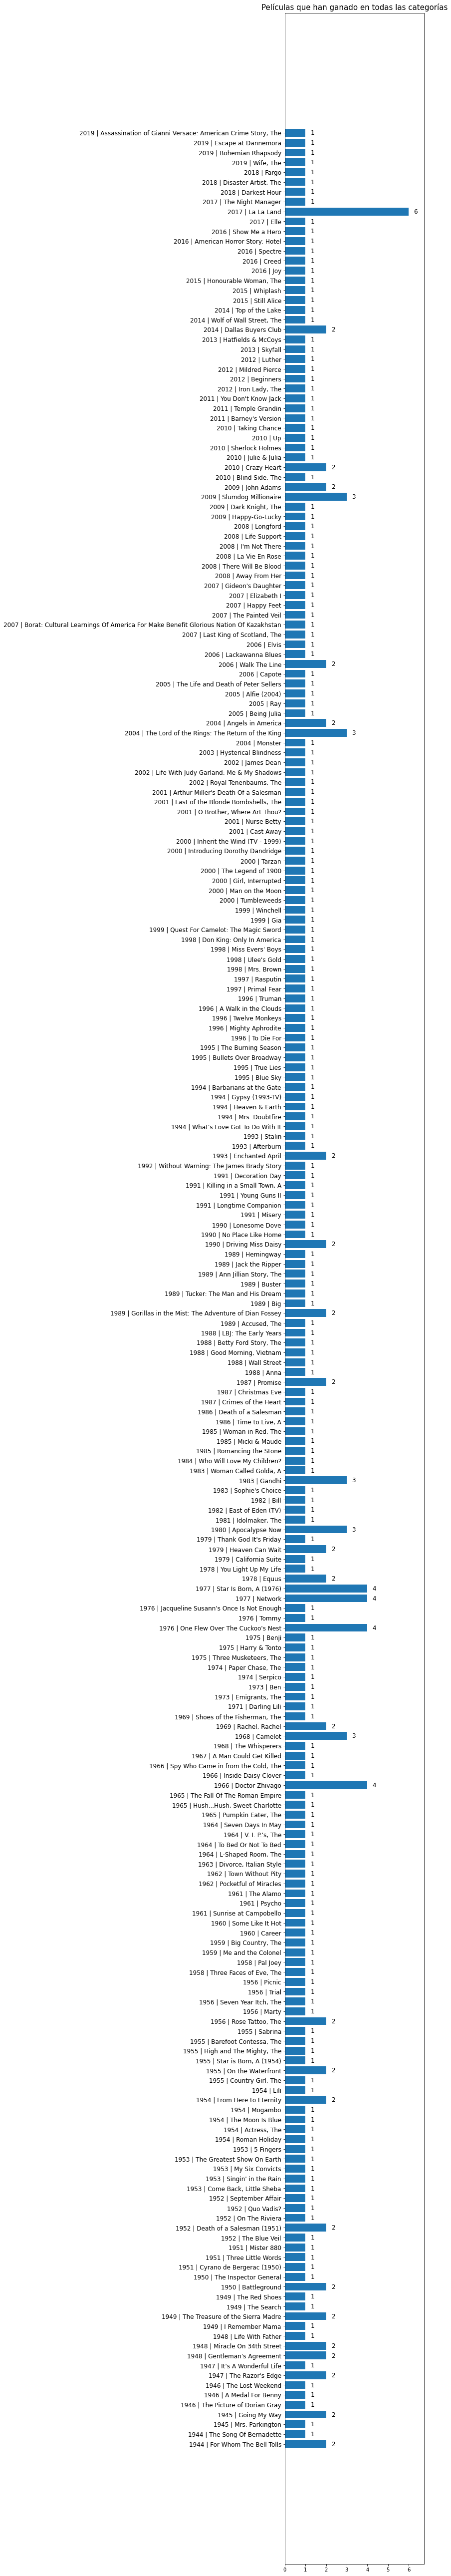

In [29]:
y = np.array([item['cantidad'] for item in peliculas])
y_labels = [item['nombre'] for item in peliculas]
x = np.arange(y.size)
height = y

plt.figure(figsize=(5, y.size//2.5))
plt.barh(x, y)
plt.xlim([0, y.max()+0.75])
plt.yticks(x, y_labels, fontsize=12)
for i in range(y.size): 
    plt.text(x = y[i]+0.25, y = i-0.2, s = y[i], fontsize=12)
plt.title('Películas que han ganado en todas las categorías', fontsize=15)
;

In [8]:
def min_victorias_peliculas(N):
    menor_anho = df.anho.min()
    mayor_anho = df.anho.max()
    peliculas = []
    for anho in range(menor_anho, mayor_anho+1):
        df_side = df.loc[(df.anho == anho) & (df.nominacion == 'Winner')]
        df_aux = df_side.loc[(df_side.categoria.isin(categorias_persona)) | (df_side.categoria.isin(categorias_pelicula))]
        nombres = []
        
        for i in range(df_aux.shape[0]):
            peli=df_aux.subtitulo[df_aux.index[i]]
            if peli == "":
                peli=df_aux.titulo[df_aux.index[i]]
                
            if df_aux.categoria[df_aux.index[i]] == "Best Motion Picture - Foreign Language":
                peli=df_aux.titulo[df_aux.index[i]]
            
            if peli not in nombres:
                nombres.append(peli)
                
        for nombre in nombres:
            si = 0
            df_ganador=df_aux.loc[(df_aux.subtitulo == nombre) | (df_aux.titulo == nombre)]
            
            si= df_ganador.shape[0]
            
            if (si >= N):
                peliculas.append({
                    'nombre': "{} | {}".format(anho, nombre),
                    'cantidad': si,
                })
    print("Cantidad de películas que ganaron al menos",N,"veces:", len(peliculas))
    return peliculas


N = 3
peliculas = min_victorias_peliculas(N)
peliculas

Cantidad de películas que ganaron al menos 3 veces: 74


[{'nombre': '1951 | Sunset Boulevard', 'cantidad': 3},
 {'nombre': '1953 | High Noon', 'cantidad': 3},
 {'nombre': '1955 | On the Waterfront', 'cantidad': 3},
 {'nombre': '1958 | Bridge on the River Kwai, The', 'cantidad': 3},
 {'nombre': '1960 | Ben-Hur', 'cantidad': 3},
 {'nombre': '1963 | Lawrence Of Arabia', 'cantidad': 3},
 {'nombre': '1965 | My Fair Lady', 'cantidad': 3},
 {'nombre': '1966 | Doctor Zhivago', 'cantidad': 5},
 {'nombre': '1967 | Man for All Seasons, A', 'cantidad': 4},
 {'nombre': '1968 | In the Heat of the Night', 'cantidad': 3},
 {'nombre': '1968 | Camelot', 'cantidad': 3},
 {'nombre': '1970 | Anne of the Thousand Days', 'cantidad': 4},
 {'nombre': '1971 | Love Story', 'cantidad': 5},
 {'nombre': '1972 | French Connection, The', 'cantidad': 3},
 {'nombre': '1973 | Godfather, The', 'cantidad': 5},
 {'nombre': '1973 | Cabaret', 'cantidad': 3},
 {'nombre': '1974 | Exorcist, The', 'cantidad': 4},
 {'nombre': '1975 | Chinatown', 'cantidad': 4},
 {'nombre': "1976 | One

In [80]:
y_labels = [item['nombre'] for item in peliculas]
x = np.arange(y.size)
height = y

plt.figure(figsize=(5, y.size//2.5))
plt.barh(x, y)
plt.xlim([0, y.max()+0.75])
plt.yticks(x, y_labels, fontsize=12)
for i in range(y.size): 
    plt.text(x = y[i]+0.25, y = i-0.2, s = y[i], fontsize=12)
plt.title(f'Películas que ganaron al menos {N} veces', fontsize=15)
;


,anho,categoria,nominacion,titulo,subtitulo
7489,2017,Best Motion Picture - Musical or Comedy,Winner,La La Land,
7504,2017,Best Performance by an Actress in a Motion Pic...,Winner,Emma Stone,La La Land
7509,2017,Best Performance by an Actor in a Motion Pictu...,Winner,Ryan Gosling,La La Land
7524,2017,Best Director - Motion Picture,Winner,Damien Chazelle,La La Land
7529,2017,Best Screenplay - Motion Picture,Winner,Damien Chazelle,La La Land
7544,2017,Best Original Score - Motion Picture,Winner,Justin Hurwitz,La La Land
7549,2017,Best Original Song - Motion Picture,Winner,"""City of Stars"", Justin Hurwitz, Benj Pasek, J...",La La Land


In [11]:
def min_victorias_actores(N):
    personas = []
    nombres = []
    df_aux=df.loc[(df.nominacion == "Winner") & (df.categoria.isin(categorias_persona))]
    
    for titulo in df_aux.titulo:
        if titulo not in nombres:
            nombres.append(titulo)
        
    for nombre in nombres:
        si = 0
        df_actor=df_aux.loc[df_aux.titulo == nombre]
        si=df_actor.shape[0]
        
        if (si >= N):
            personas.append({
                'nombre': "{}".format(nombre),
                'cantidad': si,
            })
    print("Cantidad de personas que ganaron al menos",N,"veces:", len(personas))
    return personas


N = 3
personas = min_victorias_actores(3)
personas

Cantidad de personas que ganaron al menos 3  veces: 43


[{'nombre': 'Elia Kazan', 'cantidad': 4},
 {'nombre': 'John Huston', 'cantidad': 3},
 {'nombre': 'Dimitri Tiomkin', 'cantidad': 4},
 {'nombre': 'Joanne Woodward', 'cantidad': 3},
 {'nombre': 'David Lean', 'cantidad': 3},
 {'nombre': 'Jack Lemmon', 'cantidad': 4},
 {'nombre': "Peter O'Toole", 'cantidad': 3},
 {'nombre': 'Robert Bolt', 'cantidad': 3},
 {'nombre': 'Maurice Jarre', 'cantidad': 4},
 {'nombre': 'Richard Attenborough', 'cantidad': 3},
 {'nombre': 'Jane Fonda', 'cantidad': 3},
 {'nombre': 'Gene Hackman', 'cantidad': 3},
 {'nombre': 'Ann-Margret', 'cantidad': 4},
 {'nombre': 'Francis Ford Coppola', 'cantidad': 3},
 {'nombre': 'Al Pacino', 'cantidad': 4},
 {'nombre': 'Jack Nicholson', 'cantidad': 6},
 {'nombre': 'Milos Forman', 'cantidad': 3},
 {'nombre': 'John Williams', 'cantidad': 4},
 {'nombre': 'Oliver Stone', 'cantidad': 4},
 {'nombre': 'Dustin Hoffman', 'cantidad': 4},
 {'nombre': 'Bette Midler', 'cantidad': 3},
 {'nombre': 'Meryl Streep', 'cantidad': 8},
 {'nombre': 'Rob

In [ ]:
#graficos ejercicio 6

In [14]:
def funcion7(nombre):
    columnas=["","resultado"]
    
    return pd.DataFrame(
        # ...
    )


nombre = 'Tom Hanks'
df_persona = funcion7(nombre)
df_persona

,anho,categoria,nominacion,titulo,subtitulo
7412,2016,Best Motion Picture - Foreign Language,Winner,Son of Saul,"Hungary, László Nemes"
